# <center>Welcome to Supervised Learning</center>
## <center>Part 1: Introduction to machine learning and the bias-variance tradeoff</center>
## <center>Instructor: Andras Zsom</center>

## The topic of the course series: supervised Machine Learning (ML)
- how to build an ML pipeline from beginning to deployment
- we assume you already performed data cleaning
- this is the first course out of 6 courses
    - **Part 1: Introduction to machine learning and the bias-variance tradeoff**
    - Part 2: How to prepare your data for supervised machine learning
    - Part 3: Evaluation metrics in supervised machine learning
    - Part 4: SVMs, Random Forests, XGBoost
    - Part 5: Missing data in supervised ML
    - Part 6: Interpretability
- you can complete the courses in sequence or complete individual courses based on your interest

## Tools
- we use python
    - pros: easy to use for a beginner programmer
    - cons: it is very difficult to write computationally efficient code
    - the divide between users and developers of python packages are wide
- packages we use: sklearn, pandas, numpy, matplotlib, XGBoost, SHAP
- if you are a python user, you need to know exactly what you are doing
    - carefully read the manual, work through the examples, test every line of code you write
        - good test of your understanding: could I write the function/method myself if I had to?
    - do not assume your code works, always test everything
    - there are two types of errors:
        - one that gives an error message
            - usually easy to fix
            - the error message tells you in which line the error occurs
            - read and understand the error message
            - if it's not obvious what the error is, read more on it on stackoverflow for example
        - sneaky errors without error message
            - these are tough!
            - your code runs and it gives some output but something is off
            - just staring at the code won't reveal the bug
            - print print print or use a debugger
            - check every line of code, trace issues through the code
    - to reduce the number of errors/bugs, do test-driven code development
        - first think about what the output of a function call/cell/piece of a piece of code should be
        - only then write the code
        - check if you got the expected output

### Learning objectives of this course

By the end of the course, you will be able to
- describe how a task like spam filtering can be solved with explicit coding instructions vs. a machine learning algorithm that learns from examples (training data),
- summarize the similarities and differences between supervised and unsupervised ML,
- list the pros and cons of supervised machine learning,
- define the mathematical model behind linear and logistic regression,
- explain what the loss function is,
- describe the two main types of regularization and why it is important,
- perform a simple train/validation/test split on IID data,
- apply linear and logistic regression to datasets,
- tune the regularization hyperparameter,
- identify models with high bias and high variance,
- select the best model and measure its performance on a previously unseen dataset, the test set.


# Module 1: Intro to Machine Learning
### Learning objectives of this module:
- describe how a task like spam filtering can be solved with explicit coding instructions vs. a machine learning algorithm that learns from examples (training data),
- summarize the similarities and differences between supervised and unsupervised ML,
- list the pros and cons of supervised machine learning,

### Supervised ML

- supervised ML is probably the most successful area in ML (based on economic value created)
    - **online advertising**: given an ad and user info, will the user click on the ad?
    - **real estate**: given home features, can we predict the house price?
    - **finance**: given an applicant and a finalcial product (e.g., a loan), will this applicant be able to successfully pay back the loan?
    - **health care**: given a patient, symptoms, and maybe test results, can we predict the illness? 
    - ...
- supervised ML pros:
    - **automation**: computers perform calculations faster than humans (and computers are cheaper)
    - **learn from examples**: no need to explicitly tell the computer what to do. the computer figures out what to do based on examples (data)
- supervised ML con:
    - it can be difficult or labor-intensive to collect training data
    - there is no guarantee that you will be able to develop an accurate model based on the data you have

### Example: spam filters
- Traditional coding pipeline with explicit instructions

<center><img src="figures/traditional_pipeline.png" width="600"></center>

### Example: spam filters
- ML pipeline

<center><img src="figures/ML_pipeline.png" width="600"></center>

- the data: feature matrix (X) and target variable (Y)
    - X can be structured (tabular data most commonly stored in excel and csv files or SQL databases)
    - X can be unstructured (e.g., images, text, voice recording, video)
    - Y can be categorical, the problem is **classification** (e.g., click or not click on an ad, sick or not sick)
    - Y can be continuous, the problem is **regression** (e.g., predict house price, stock price, age)
    - Y can be missing, the problem is **clustering**
- **we focus on structured data during the course series!**

### Structured data
| X|feature_1|feature_2|...|feature_j|...|feature_m|<font color='red'>Y</font>|
|-|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|__data_point_1__|x_11|x_12|...|x_1j|...|x_1m|__<font color='red'>y_1</font>__|
|__data_point_2__|x_21|x_22|...|x_2j|...|x_2m|__<font color='red'>y_2</font>__|
|__...__|...|...|...|...|...|...|__<font color='red'>...</font>__|
|__data_point_i__|x_i1|x_i2|...|x_ij|...|x_im|__<font color='red'>y_i</font>__|
|__...__|...|...|...|...|...|...|__<font color='red'>...</font>__|
|__data_point_n__|x_n1|x_n2|...|x_nj|...|x_nm|__<font color='red'>y_n</font>__|

### Other areas of ML
- unsupervised ML 
   - only the feature matrix X is available, there is no target variable
   - the goal is to find structure (clusters) in the data
   - often used in customer segmentation
- recommender systems
   - recommend products to a customer based on what products similar customers enjoyed
- reinforcement learning
   - the learning system, called an agent, can observe the environment, select and perform actions, and get rewards and penalties in return. Goal: come up with strategy to maximize rewards
   - often used when virtual environment is available (e.g., games like go or warcraft)
   - sounds appealing to use in real environments (like self-driving cars) but agents learn slow, lots of cars would need to be broken to teach an agent to drive this way 
- deep learning
   - uses neural networks and often works with unstructured data
   - technically deep learning is supervised or unsupervised
   - extremely successful on large datasets

<center><img src="figures/shallow_vs_deep_learning.png" width="500"></center>

# Module 2: Overview of linear and logistic regression with regularization
### Learning objectives of this module:
- define the mathematical model behind linear and logistic regression,
- explain what the loss function is,
- describe the two main types of regularization and why it is important,

### Supervised ML algorithms: three parts
- 1) **a mathematical model ($f$)** is used to convert the feature values into a prediction

$f(X_i) = y_i'$, where $i$ is the $i$th data point in our sample. $X_i$ is a vector and $y_i'$ is a number.
    - $f$ is your supervised ML algorithm
    - it usually has a number of intrinsic parameters 
- 2) **an optimization algorithm** is used to determine the intrinsic parameter values given the training set 
    - there are various algorithms
    - e.g., gradient descent, backpropagation
- 3) the optimization algorithm minimizes a metric called **the cost function**
    - the cost function is used to determine the best intrinsic parameters of one model based on the training data

### Linear Regression

In [ ]:
# these lines are just illustration
# no X_train or y_train are defined yet so it won't run
from sklearn.linear_model import LinearRegression # import the model
LinReg = Linear_Regression() # initialize a simple linear regression model 
LinReg.fit(X_train,y_train) # we will learn now what happens when you issue this line

- This is the **mathematical model**:
    #### <center>$f(X_i) = y_i' = \theta_0 + X_{i1} \theta_1 + X_{i2} \theta_2 +$ ... $= \theta_0 + \sum_{j=1}^{m} \theta_j  X_{ij} $,</center>
where $y_i'$ is the prediction of the linear regression model and $\theta$ are parameters.
- The **optimization algorithm** is some form of gradient descent
    - we won't go into detail but the basic idea is that gradient descent will find the $\theta$ values that minimize the cost function on the training data
- The **cost function** is MSE - mean squared error
    #### <center>$MSE(y,y') = \frac{1}{n}\sum_{i=1}^{n}(y_i'-y_i)^2$</center>


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression() # initialize a simple logistic regression model
LogReg.fit(X_train,y_train) # we will learn what happens when you issue this line in classification

- name is misleading, logistic regression is for classification problems!
- the model:

<center>$f(X_i) = y_i' = \frac{1}{1+e^{-z}}$, where</center>

<center>$z = \theta_0 + \sum_{j=1}^{m} \theta_j  x_{ij}$</center>

- $f(z) = \frac{1}{1+e^{-z}}$ is the sigmoid function which maps real values to be between 0 and 1 such that the real value 0 is mapped to 0.5. 
    - the output of a sigmoid function can be thought of as a predicted probability.

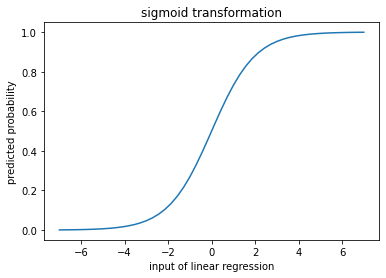

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1/(1+np.exp(-z))

z = np.linspace(-7,7,50)

plt.plot(z,sigmoid(z))
plt.xlabel('input of linear regression')
plt.ylabel('predicted probability')
plt.title('sigmoid transformation')
plt.savefig('figures/sigmoid_trans.png',dpi=300)
plt.show()

- The **optimization algorithm** is some form of gradient descent
- the logloss metric is used as a **cost function** in logistic regression

<center>$L(\theta) = - \frac{1}{N}\sum_{i=1}^{n} [y_i\ln(y_i') + (1-y_i)\ln(1-y_i')]$ </center>

- two scenarios:
   - y_i = 0 - left term disappears
   - y_i = 1 - right term disappears
- log(0) is undefined
   - $y_i'$ is usually replaced with $\max(\min(y_i',1-10^{-15}),10^{-15})$ to avoid this issue

**The extreme cases**

- the classifier is confidently wrong
   - $y_i' = 10^{-15}$ for points in class 1
   - $y_i' = 1 - 10^{-15}$ for points in class 0
<center>$logloss = -\frac{1}{N}\sum \ln(10^{-15}) = -\ln(10^{-15})$</center>
<center> $logloss \sim  34.5  $</center>

- the classifier is correct
   - $y_i' = 10^{-15}$ for points in class 0
   - $y_i' = 1 - 10^{-15}$ for points in class 1
<center>$logloss = -\frac{1}{N}\sum (1-0)(1-\ln(1-10^{-15})) = 10^{-15}$ for class 0</center>
<center>$logloss = -\frac{1}{N}\sum 1*\ln(1-10^{-15}) = 10^{-15}$ for class 1</center>
<center>$logloss \sim 0$</center>

- the logloss metric also needs to be minimized

### Regularization
- models tend to overfit on the training data and such models don't perform well on previously unseen points
    - a sure sign of overfitting in linear and logistic regression is huge theta values, much larger than the typical ranges of your features and target variable
    - overfitting means that the model fits the noise rather than the underlying structure
        - e.g., fitting a high degree polinomial to a roughly linearly correlated set of points
- one way to address this shortcoming of ML models is regularization
- let's change the cost function and add a <font color='RED'>penalty term</font> for large thetas
- **Lasso regression**: regularize using the l1 norm of theta:
   
<center>$L(\theta) =$ original cost $+ \color{red}{ \frac{\alpha}{m} \sum_{j=0}^{m}|\theta_j|}$</center>   
   
- **Ridge regression**: regularize using the l2 norm of theta:
   
<center>$L(\theta) =$ original cost $+ \color{red}{\frac{\alpha}{m} \sum_{j=0}^{m} \theta_j^2}$</center>

- $\alpha$ is the regularization parameter (0 or larger), it describes how much we penalize large thetas


### Regulariztion in linear regression
- the original cost function is MSE and we add the penalty term
- **Lasso regression**: regularize using the l1 norm of theta:
   
<center>$L(\theta) = \frac{1}{n}\sum_{i=1}^{n}[(\theta_0 + \sum_{j=1}^{m} \theta_j  x_{ij}- y_i)^2] + \color{red}{ \frac{\alpha}{m} \sum_{j=0}^{m}|\theta_j|}$</center>   
   
- **Ridge regression**: regularize using the l2 norm of theta:
   
<center>$L(\theta) = \frac{1}{n}\sum_{i=1}^{n}[(\theta_0 + \sum_{j=1}^{m} \theta_j  x_{ij}- y_i)^2] + \color{red}{\frac{\alpha}{m} \sum_{j=0}^{m} \theta_j^2}$</center>


### Regulariztion in logistic regression
- the original cost is logloss and we add the penalty term
- **Lasso regression**: regularize using the l1 norm of theta:

<center>$L(\theta) = - \frac{1}{N}\sum_{i=1}^{n} [y_i\ln(\frac{1}{1+e^{-\theta_0 + \sum_{j=1}^{m} \theta_j  x_{ij}}}) + (1-y_i)\ln(1-\frac{1}{1+e^{-\theta_0 + \sum_{j=1}^{m} \theta_j  x_{ij}}}))] + \color{red}{ \frac{\alpha}{m} \sum_{j=0}^{m}|\theta_j|}$</center>

- **Ridge regression**: regularize using the l2 norm of theta:

<center>$L(\theta) = - \frac{1}{N}\sum_{i=1}^{n} [y_i\ln(\frac{1}{1+e^{-\theta_0 + \sum_{j=1}^{m} \theta_j  x_{ij}}}) + (1-y_i)\ln(1-\frac{1}{1+e^{-\theta_0 + \sum_{j=1}^{m} \theta_j  x_{ij}}}))] + \color{red}{\frac{\alpha}{m} \sum_{j=0}^{m} \theta_j^2}$</center>

### Let's translate these concepts to code in the next module!

# Module 3: The bias-variance tradeoff
### Learning objectives of this module:
- perform a simple train/validation/test split on IID data,
- apply linear and logistic regression to datasets,
- tune the regularization hyperparameter,
- identify models with high bias and high variance,
- select the best model and measure its performance on a previously unseen dataset, the test set.


In [2]:
# STEP 1: read in the data

# https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

import pandas as pd
df = pd.read_csv('https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt',delimiter='\t')
print(df.head())

# separate out the feature matrix and the target variable
y = df.iloc[:,-1] # the last column is the target variable
X = df.iloc[:,:-1] # all but the last column are the features
print(y.head())
print(X.head())

   AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6    Y
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87  151
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69   75
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85  141
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89  206
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80  135
0    151
1     75
2    141
3    206
4    135
Name: Y, dtype: int64
   AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80


In [11]:
# STEP 2: split the data
from sklearn.model_selection import train_test_split

X_other, X_test, y_other, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_other,y_other,test_size=0.25,random_state=1)

# verify the results
print(X_train.shape) # 60% for training
print(X_val.shape) # 20% for validation
print(X_test.shape) # 20% for testing

(264, 10)
(89, 10)
(89, 10)


In [12]:
# STEP 3: preprocess the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # initialize the scaler

X_train_prep = scaler.fit_transform(X_train)
X_val_prep = scaler.transform(X_val)
X_test_prep = scaler.transform(X_test)

# the _prep objects are now numpy arrays
# let's verify that all feature means are 0 and stds are 1
print(np.mean(X_train_prep,axis=0))
print(np.std(X_train_prep,axis=0))
print(np.mean(X_val_prep,axis=0)) # not exactly 0
print(np.std(X_val_prep,axis=0)) # not exactly 1
print(np.mean(X_test_prep,axis=0)) # not exactly 0
print(np.std(X_test_prep,axis=0)) # not exactly 1

[-1.88401483e-16  1.68215610e-16 -1.58122673e-16  2.85966537e-16
 -2.92695161e-16 -3.36431220e-17 -3.70074342e-17  4.47453522e-16
 -7.77156117e-16  4.97918205e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[ 0.00482376 -0.03301861  0.12600247 -0.01374034  0.05696159  0.0065957
  0.14555163 -0.13140355 -0.02451996 -0.09520641]
[1.04300891 0.99719443 1.03188936 1.0245732  1.02866879 1.00032617
 0.91058225 0.8268551  1.07662793 1.04397869]
[ 0.0152835   0.05707869 -0.15068117 -0.09269383 -0.07121409 -0.08617701
  0.12650139 -0.15334999 -0.08066075 -0.18983855]
[1.03447167 1.00226924 0.94563471 0.99350518 1.00946002 1.04830518
 1.05149569 0.95477113 0.92799668 0.86719968]


[1.00000000e-02 2.15443469e-02 4.64158883e-02 1.00000000e-01
 2.15443469e-01 4.64158883e-01 1.00000000e+00 2.15443469e+00
 4.64158883e+00 1.00000000e+01 2.15443469e+01 4.64158883e+01
 1.00000000e+02]


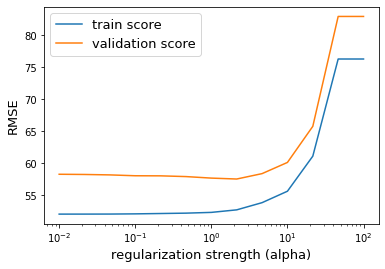

In [13]:
# STEP 4: 
# train linear regression models
# tune the regularization parameter
# calculate and visualize train and validation scores
# select the model that performs best on the validation set
# calculate the generalization error using the test set

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

alphas = np.logspace(-2,2,13)
print(alphas)

train_scores = []
val_scores = []
models = []
for alpha in alphas:
    # initialize the model
    linreg = Lasso(alpha=alpha)
    # fit it to the training set
    linreg.fit(X_train_prep,y_train)
    # save the model
    models.append(linreg)
    # calculate and save train score
    y_train_pred = linreg.predict(X_train_prep)
    train_score = mean_squared_error(y_train,y_train_pred,squared=False)
    train_scores.append(train_score)
    # calculate and save val score
    y_val_pred = linreg.predict(X_val_prep)
    val_score = mean_squared_error(y_val,y_val_pred,squared=False)
    val_scores.append(val_score)
    
# let's visualize the train and validation scores
plt.plot(alphas,train_scores,label='train score')
plt.plot(alphas,val_scores,label='validation score')
plt.xlabel('regularization strength (alpha)',fontsize=13)
plt.ylabel('RMSE',fontsize=13)
plt.semilogx()
plt.legend(fontsize=13)
plt.savefig('figures/bias-variance.png',dpi=300)
plt.show()

### The bias-variance tradeoff
- high alpha (strong regularization):
    - the model is too simple
    - it performs poorly on both the training and validation sets (RMSEs are large)
    - high bias or low variance model
- low alpha (weak regularization)
    - the model is too complex
    - it performs very well on the training set but it performs comparatively poorly on the validation set
    - low bias or high variance model
- we are looking for the sweet spot in between
    - if your evaluation metric needs to be minimized (e.g., MSE, RMSE, logloss)
        - select the alpha with the smallest validation score
        - the corresponding model is the best
    - if your evaluation metric needs to be maximized (e.g., accuracy, R2)
        - select the alpha with the largest validation score
        - the corresponding model is the best

### Let's select the best model and calculate the generalization error

In [14]:
indx = np.argmin(val_scores)
print('best alpha:',alphas[indx]) # the best alpha value
print('best validation score:',val_scores[indx]) # the validation score
final_model = models[indx] # pull out the best model
y_test_pred = final_model.predict(X_test_prep)
gen_error = mean_squared_error(y_test,y_test_pred,squared=False)
print('the generalization error:',gen_error) # the error we expect from the model on previously unseen data

best alpha: 2.154434690031882
best validation score: 57.4873819354221
the generalization error: 54.72060685174691


### Things we ignored but will cover in later courses
- uncertainty due to splitting
    - different random states in train_test_split place different points in train/val/test
    - the random splitting of points introduces an uncertainty in the train/val/test scores and the best alpha values too
    - redo the whole pipeline with a couple of different random states to measure the uncertainty of generalization
- splitting
    - simple IID datasets like this are rare
    - part 2 covers more interesting splitting strategies
- preprocessing
    - this dataset is simple, all features are already numerical so preprocessing was easy (one standard scaler)
    - part 2 deals with more complex preprocessing pipelines
- more complex models have more than one hyperparameters to tune
    - nested for loops should be avoided
    - sklearn has excellent tools to do hyperparameter tuning over an arbitrary number of parameters
    - we cover this in part 4
- interpretability
    - predictions are often not enough!
    - you need to be able to explain how the model works and how it makes predictions
    - the doctor needs to be able to explain to the patient what factors influence the predicted disease progression in general but also for that patient in particular
    - part 6 covers this in detail